In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,regexp_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
df=pd.read_csv('train_2kmZucJ.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
df.shape

(7920, 3)

In [4]:
tweet=df['tweet']
label=df['label']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(tweet,label,test_size=.20,random_state=42)

In [6]:
stop_words=stopwords.words('english')
lem=WordNetLemmatizer()

In [7]:
def preprocessing(tweet):
    token_no_url=re.sub(r'http\S+', ' ',tweet)
    final = ' '.join([re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in token_no_url.split("\n")])
    tokens=word_tokenize(final,language='english')
    norm_tokens=[lem.lemmatize(i.lower(),pos='v') for i in tokens]
    filter_token=[token.lower() for token in norm_tokens if token.lower() not in stop_words]
    return " ".join(filter_token)
    
    
    
    

In [8]:
x_train=x_train.apply(lambda x :preprocessing(x))

In [9]:
x_test=x_test.apply(lambda x:preprocessing(x))

In [10]:
x_train.head()


4252    cool car wash idea theisland bankholidaymonday...
4428    photo 35th birthday sony walkman thinkgeek nob...
7374    ipads biggest pile fuck planet want throw fuck...
1410    yearbook hmmmmm instagram instagood together f...
7896    piss macbook crash apple company nothing apple...
Name: tweet, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()


In [12]:
x_train_mat=cv.fit_transform(x_train)
x_test_mat=cv.transform(x_test)

In [13]:
cv.get_feature_names()

['00',
 '000',
 '002',
 '0051',
 '00am',
 '00pm',
 '01',
 '010111',
 '010315',
 '011',
 '01108nartl',
 '01634',
 '01am',
 '01amapril',
 '01amjune',
 '01ammay',
 '01pm',
 '01pmapril',
 '01pmjune',
 '02',
 '02pyow4aag',
 '03',
 '035glzwp4r',
 '04',
 '0490love',
 '05',
 '06',
 '07',
 '07yilmaz242',
 '08',
 '08184820028',
 '08t',
 '09',
 '0bfnzanwty',
 '0cmcjv1vdj',
 '0d9dzq0cxo',
 '0ey7tmubxe',
 '0eyq6dwgxy',
 '0fcbzlaj9i',
 '0ffj5vnrfo',
 '0g',
 '0gl7ddfrbk',
 '0k3k1wc8fk',
 '0k8h8yuufr',
 '0ljymldhby',
 '0mjjnomhpy',
 '0mp',
 '0p48k68rac',
 '0ssqhh798x',
 '0t4z54vzxg',
 '0tjig7dfzv',
 '0vihbaapiq',
 '0vkcataugw',
 '0wautkfgi8',
 '0wqftykprt',
 '0x',
 '0yk3fbch0c',
 '10',
 '100',
 '1000',
 '10000',
 '100400',
 '100happyday',
 '100happydays',
 '100likes',
 '100odd',
 '101',
 '102409',
 '104x50x60',
 '106',
 '106finalact',
 '10gb',
 '10likes',
 '10mpx',
 '10pcs',
 '10th',
 '10x',
 '11',
 '1111',
 '114',
 '117',
 '1180',
 '118mb',
 '11h',
 '11luglio',
 '11pm',
 '11september',
 '12',
 '120',

In [14]:
mnb=MultinomialNB()
mnb.fit(x_train_mat.toarray(),y_train)

MultinomialNB()

In [15]:
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
pred=mnb.predict(x_test_mat.toarray())
print(f1_score(y_test,pred,average='weighted'))

0.9009856772622182


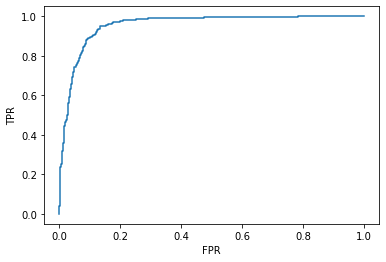

In [16]:
import matplotlib.pyplot as plt
prob=mnb.predict_proba(x_test_mat)[::,1]
fpr,tpr,threshold=roc_curve(y_test,prob)
plt.xlabel('FPR')
plt.ylabel("TPR")
plt.plot(fpr,tpr)


In [17]:
tuning=pd.DataFrame({'FPR':fpr,'TPR':tpr,"THRESHOLD":threshold})

tuning[tuning['TPR']>.80][30:40]

,FPR,TPR,THRESHOLD
158,0.090278,0.884259,0.413640
159,0.091146,0.884259,0.413551
160,0.091146,0.886574,0.407006
161,0.092882,0.886574,0.393892
162,0.092882,0.888889,0.372833
163,0.098090,0.888889,0.337106
164,0.098090,0.891204,0.336223
165,0.100694,0.891204,0.303468
166,0.100694,0.893519,0.303185
167,0.103299,0.893519,0.282843


In [18]:
new_pred=[]
for i in prob:
    if i >0.372833:
        new_pred.append(1)
    elif i<0.372833:
        new_pred.append(0)

In [19]:
print(f1_score(y_test,new_pred,average='weighted'))

0.90334121020248


In [20]:

test=pd.read_csv('test_oJQbWVk.csv')
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [21]:
test['cleaned_tweets']=test['tweet'].apply(lambda x:preprocessing(x))

In [22]:

test_mat=cv.transform(test['cleaned_tweets'])

In [23]:
test_pre=mnb.predict(test_mat.toarray())

In [29]:
prob1=mnb.predict_proba(test_mat)[::,1]

In [30]:
test_pred1=[]
for i in prob1:
    if i >0.372833:
        test_pred1.append(1)
    elif i<0.372833:
        test_pred1.append(0)

In [31]:
test['sentiment']=test_pred1

In [32]:
test.head(10)

,id,tweet,cleaned_tweets,sentiment
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate new iphone upgrade win let download apps ...,1
1,7922,currently shitting my fucking pants. #apple #i...,currently shit fuck pant apple imac cashmoney ...,1
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like put cd roms ipad possible yes block screen,1
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lose picture videos 1d 5s...,1
4,7925,Been fighting iTunes all night! I only want th...,fight itunes night want music pay,1
5,7926,#Repost @getbakednfried with repostapp ・・・ to ...,repost getbakednfried repostapp announce apple...,0
6,7927,This new apple software update is really doing...,new apple software update really things phone ...,1
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appl...,baby iphone iphone6s gold new apple appleisbes...,0
8,7929,I'm confused...why did I have to take the time...,confuse take time set appointment still wait 4...,1
9,7930,Fruit just tastes better when you pick it your...,fruit taste better pick apple healthy fruit ny...,0


In [26]:
submisssion=pd.DataFrame({'id':test["id"],'label':test_pre})


In [27]:
submisssion.to_csv(r'submission_tweets.csv', index = False)